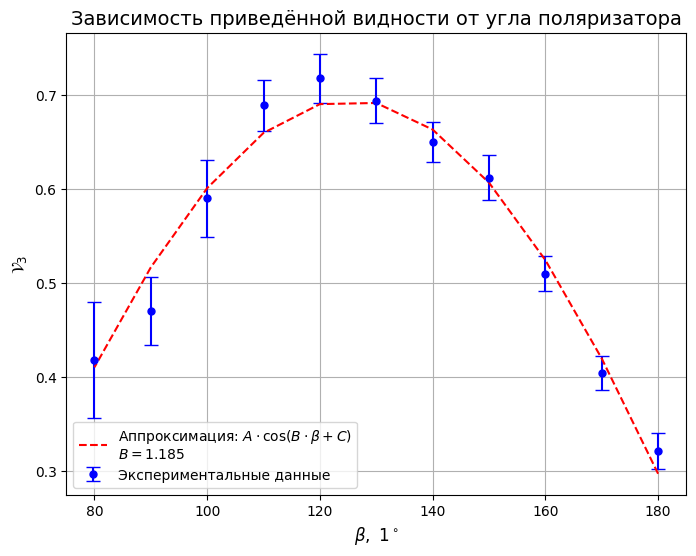

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные
beta = np.array([180, 170, 160, 150, 140, 130, 120, 110, 100, 90, 80])
V3 = np.array(
    [0.321, 0.404, 0.510, 0.612, 0.650, 0.694, 0.718, 0.689, 0.590, 0.470, 0.418]
)
dV3 = np.array(
    [0.019, 0.018, 0.019, 0.024, 0.021, 0.024, 0.026, 0.027, 0.041, 0.036, 0.062]
)


# Функция для аппроксимации
def fit_func(beta, A, B, C):
    return A * np.cos(B * np.radians(beta) + C)


# Аппроксимация
params, pcov = curve_fit(fit_func, beta, V3, sigma=dV3, absolute_sigma=True)
A, B, C = params
_, dB, _ = np.sqrt(np.diag(pcov))

# Построение графика
plt.figure(figsize=(8, 6))
plt.errorbar(
    x=beta,
    y=V3,
    yerr=dV3,
    color="blue",
    linestyle="",
    capsize=5,
    label="Экспериментальные данные",
    marker="o",
    ms=5,
)
plt.plot(
    beta,
    fit_func(beta, A, B, C),
    color="red",
    linestyle="--",
    label=f"Аппроксимация: $A \\cdot \\cos(B\\cdot\\beta+C) $\n$B={B:.3f}$",
)
plt.xlabel(r"$\beta,~1^\circ$", fontsize=12)
plt.ylabel(r"$\mathcal{V}_3$", fontsize=12)
plt.title(r"Зависимость приведённой видности от угла поляризатора", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

C:\Users\stg05\AppData\Local\Temp\ipykernel_18960\564021201.py:166: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(l, V3, yerr=dV3, fmt="o-", capsize=5, linestyle="")


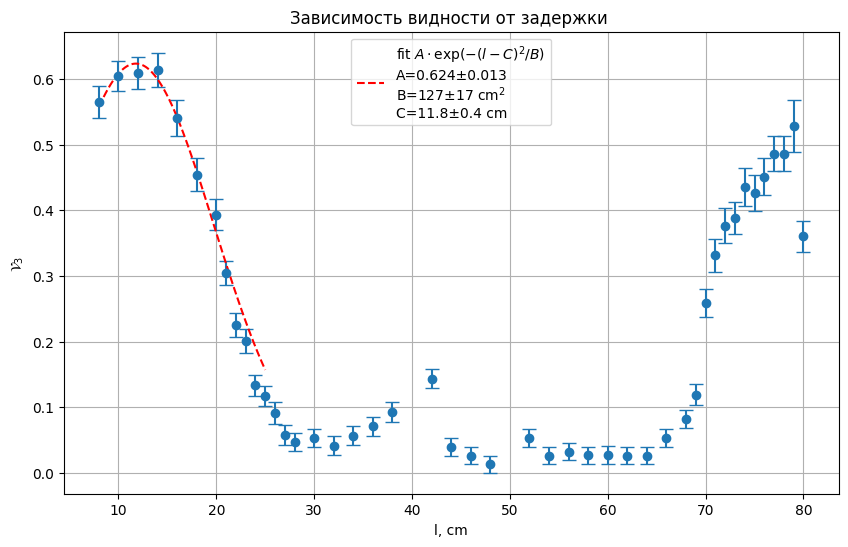

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
l = np.array(
    [
        8,
        10,
        12,
        14,
        16,
        18,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        30,
        32,
        34,
        36,
        38,
        40,
        42,
        44,
        46,
        48,
        50,
        52,
        54,
        56,
        58,
        60,
        62,
        64,
        66,
        68,
        69,
        70,
        71,
        72,
        73,
        74,
        75,
        76,
        77,
        78,
        79,
        80,
    ]
)
V3 = np.array(
    [
        0.564809528,
        0.604367223,
        0.609566591,
        0.614462787,
        0.540336314,
        0.454568645,
        0.393276335,
        0.304141551,
        0.224988521,
        0.200617284,
        0.133127485,
        0.117041802,
        0.091287093,
        0.057283315,
        0.046548223,
        0.053014669,
        0.041192628,
        0.056199888,
        0.070710678,
        0.092912163,
        np.nan,
        0.143009542,
        0.039455977,
        0.025854384,
        0.012961896,
        np.nan,
        0.052850422,
        0.025649459,
        0.032282576,
        0.026376949,
        0.027196415,
        0.026116115,
        0.025854384,
        0.052700922,
        0.081364087,
        0.118677555,
        0.259080646,
        0.331744401,
        0.376889181,
        0.388353872,
        0.435556737,
        0.426601604,
        0.451404976,
        0.486639435,
        0.486639435,
        0.528382105,
        0.360255396,
    ]
)
dV3 = np.array(
    [
        0.024524624,
        0.023088921,
        0.024672933,
        0.025932972,
        0.027517127,
        0.024921527,
        0.023725346,
        0.01794408,
        0.018627296,
        0.018371342,
        0.016038243,
        0.015796403,
        0.016651442,
        0.01502571,
        0.013533067,
        0.013425793,
        0.014119193,
        0.014633586,
        0.014849242,
        0.015132868,
        np.nan,
        0.014504478,
        0.013320129,
        0.013013604,
        0.013035939,
        np.nan,
        0.01333844,
        0.012841604,
        0.012945749,
        0.01335014,
        0.013859711,
        0.013188291,
        0.013013604,
        0.013244711,
        0.013750341,
        0.016120368,
        0.021769971,
        0.02519134,
        0.026339414,
        0.024657389,
        0.029367083,
        0.027761798,
        0.02835884,
        0.026580189,
        0.026580189,
        0.039743026,
        0.023516672,
    ]
)

# Удаляем значения NaN из данных
l = l[~np.isnan(V3)]
dV3 = dV3[~np.isnan(V3)]
V3 = V3[~np.isnan(V3)]

# Создаем график
plt.figure(figsize=(10, 6))
plt.errorbar(l, V3, yerr=dV3, fmt="o-", capsize=5, linestyle="")

# Настраиваем график
plt.xlabel("l, cm")
plt.ylabel("$\\mathcal{V}_3$")
plt.title("Зависимость видности от задержки ")
plt.grid(True)


curve = lambda x, A, B, C: A * np.exp(-1 / B * (x - C) ** 2)
popt, pcov = curve_fit(
    curve, l[0:8], V3[0:8], sigma=dV3[0:8], absolute_sigma=True, p0=(0.6, 1, 14)
)
A, B, C = popt
dA, dB, dC = np.sqrt(np.diag(pcov))
ls = np.linspace(8, 25, 100)
plt.plot(
    ls,
    curve(ls, A, B, C),
    "r--",
    label="fit $A \\cdot \\exp (-(l-C)^2/B)$ \nA=%.3f±%.3f\nB=%.0f±%.0f cm$^2$\nC=%.1f±%.1f cm"
    % (A, dA, B, dB, C, dC),
)

plt.legend()
# Отображаем график
plt.show()